### Importando as bibliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Diagrama de autocorrelação(ACF) e Diagrama de autocorrelação parcial(PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Modelo Arima
from statsmodels.tsa.arima_model import ARIMA

# Resíduos
from pandas import DataFrame

In [16]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('Dados//AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

### Gráfico de Autocorrelação

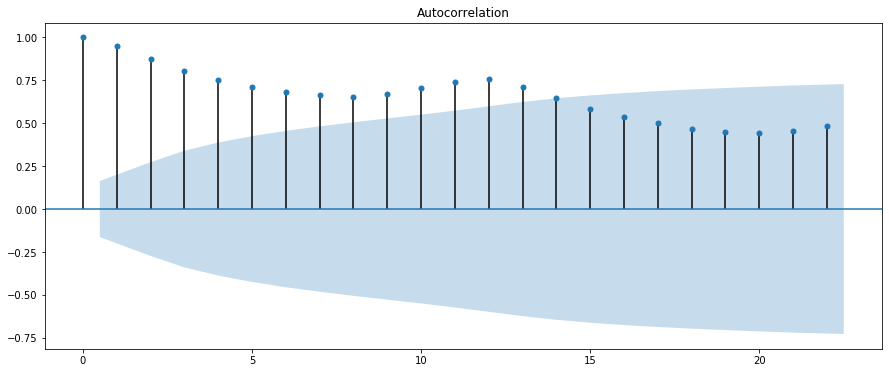

In [17]:
plot_acf(data)
plt.show()

### Gráfico de Autocorrelação parcial

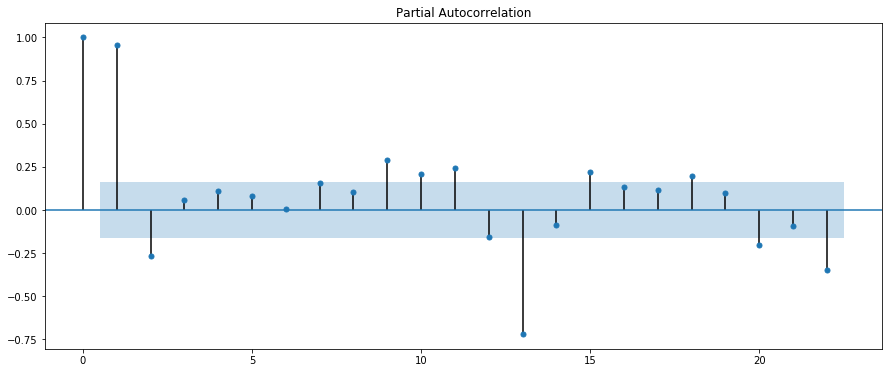

In [18]:
plot_pacf(data)
plt.show()

### Aplicando o modelo arima

In [37]:
'''
order=(p, d, q)
p -> Ordem da parte autoregressiva
d -> Grau de diferenciação
q -> Ordem da média móvel

d = 1 significa que será aplicada diferenciação de primeira ordem

AIC: 1390.495
AIC: 1361.696 Melhor modelo order(2, 1, 1)
usando novas configurações do arima, conseguimos minimizar os valores, obtendo assim uma 
melhor modelo.
'''

model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\danilo portela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\danilo portela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -688.248
Method:                       css-mle   S.D. of innovations             29.720
Date:                Sat, 20 Jun 2020   AIC                           1390.495
Time:                        12:55:36   BIC                           1411.235
Sample:                    02-01-1949   HQIC                          1398.923
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6402      2.016      1.310      0.190      -1.311       6.592
ar.L1.D.#Passengers     0.3120      0.084      3.715      0.000       0.147       0.477
ar.L2.D.#Passeng

### Imprimindo os residuais 

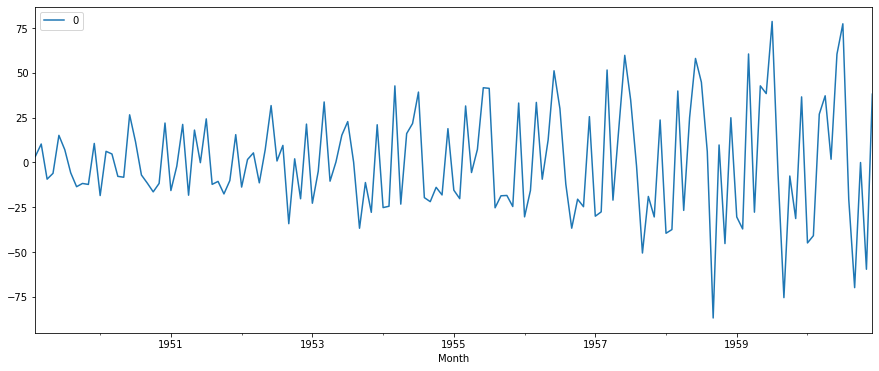

In [38]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

### Diagrama de densidade dos residuos

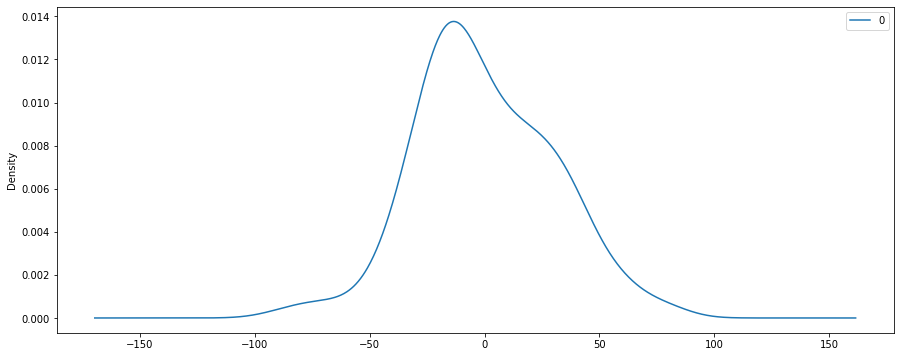

                0
count  143.000000
mean     0.010266
std     29.828334
min    -86.805627
25%    -19.916206
50%     -5.624243
75%     21.573863
max     78.697554


In [39]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

A mean: 0.010266 está próxima de zero, mas não é zero, isso indica que o modelo utilizado não é muito bom

### Avaliando a qualidade do modelo

In [47]:
X = data.values

Previsto=383.349040, Esperado=340.000000
Previsto=351.781288, Esperado=318.000000
Previsto=322.739349, Esperado=362.000000
Previsto=372.884428, Esperado=348.000000
Previsto=333.332464, Esperado=363.000000
Previsto=382.493451, Esperado=435.000000
Previsto=435.787801, Esperado=491.000000
Previsto=502.006346, Esperado=505.000000
Previsto=497.701899, Esperado=404.000000
Previsto=347.130135, Esperado=359.000000
Previsto=364.777346, Esperado=310.000000
Previsto=307.297436, Esperado=337.000000
Previsto=394.595017, Esperado=360.000000
Previsto=377.731233, Esperado=342.000000
Previsto=343.945946, Esperado=406.000000
Previsto=419.247981, Esperado=396.000000
Previsto=377.269102, Esperado=420.000000
Previsto=433.784191, Esperado=472.000000
Previsto=462.008884, Esperado=548.000000
Previsto=569.727752, Esperado=559.000000
Previsto=544.074823, Esperado=463.000000
Previsto=418.350409, Esperado=407.000000
Previsto=395.543467, Esperado=362.000000
Previsto=369.154128, Esperado=405.000000
Previsto=462.556

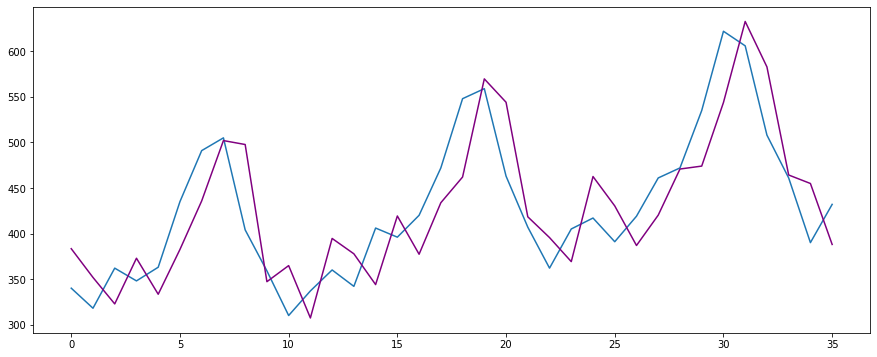

In [48]:
size = int(len(X) * 0.75) # 75% para treino
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('Previsto=%f, Esperado=%f' %(yhat, obs))
    
plt.plot(test)
plt.plot(predictions, color='purple')
plt.show()